In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cross_validation as CV
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.feature_extraction import DictVectorizer as DV

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv',index_col='Id')
Sz = data.shape
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


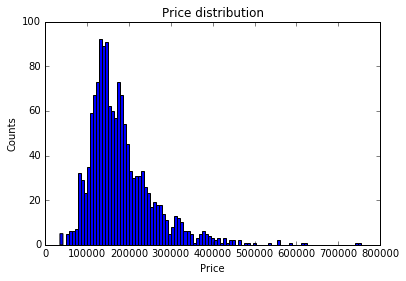

In [3]:
features = data.drop('SalePrice',axis = 1)
price = data.SalePrice
plt.hist(price,bins = 100)
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Price distribution')
plt.show()

## Search and fill empty numeric values

In [4]:
num_columns = features.select_dtypes(exclude=['object']).columns
obj_columns = features.select_dtypes(include=['object']).columns

num_features = features[num_columns];
num_features.fillna(0,inplace=True);

obj_features = features[obj_columns];
obj_features.fillna('empty',inplace=True);

encoder = DV(sparse = False);
t = obj_features.T.to_dict().values();
encoded_data = encoder.fit_transform(t);

transFeatures = np.hstack([num_features, encoded_data]);
transFeatures.shape

/home/frodos/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2756: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(1460, 304)

## Test GB Regression for raw numerical data

In [9]:
# preprocessing
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()

Kf = CV.KFold(num_features.shape[0], n_folds= 5, shuffle=True)
trees = GBR(n_estimators=1000,verbose = 1,max_depth=5);

scr1 = np.array([]);
scr3 = np.array([]);

for train_index,test_index in Kf:
    # full dataset
    trees.fit(transFeatures[train_index,:],price.iloc[train_index]);
    sc = trees.score(transFeatures[test_index,:],price.iloc[test_index]);
    print sc
    scr3 = np.append(scr3, sc)    
    

print 'R^2', scr3.mean()
print scr3

      Iter       Train Loss   Remaining Time 
         1  5410520635.5253            1.36m
         2  4526467722.3516            1.29m
         3  3793500916.9754            1.24m
         4  3199691223.4495            1.22m
         5  2698500299.4256            1.21m
         6  2295177320.3870            1.20m
         7  1954001788.4129            1.19m
         8  1668719673.9036            1.19m
         9  1435393575.7237            1.19m
        10  1235654101.7150            1.19m
        20   364784952.7183            1.16m
        30   171729808.1237            1.14m
        40   110040133.7388            1.12m
        50    85282527.6325            1.10m
        60    70639745.3208            1.08m
        70    61760353.6044            1.04m
        80    54404452.6244            1.01m
        90    48303423.4167           58.49s
       100    42436598.2554           57.02s
       200    13748635.1181           48.26s
       300     5367134.1331           41.47s
       40

Нормализация данных позволяет улучшить предсказания на доли процента (в среднем).

In [5]:
for train_index,test_index in Kf:
    plt.figure()
    plt.hist(price.iloc[train_index],bins = 20)
    plt.hist(price.iloc[test_index],bins = 20)

NameError: name 'Kf' is not defined

In [134]:
trees.get_params

<bound method GradientBoostingRegressor.get_params of GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)>